In [6]:
import matplotlib.pyplot as plot
import numpy as np
import cv2
%matplotlib inline

# 简单图像处理

## 色彩空间

颜色空间 ColorSpace跟向量空间其实是一个东西. 举例RGB色彩空间, 我们用Red红色通道, Green绿色通道, Blue蓝色通道三个值来表示一个特定的色彩. 如果我们把颜色当作向量, 那所有向量的集合就是 色彩空间, 那RGB的色彩空间长成什么样呢?

就是这样的:
![1280px-RGB_Cube_Show_lowgamma_cutout_b](./img/1280px-RGB_Cube_Show_lowgamma_cutout_b.png)
每个颜色在这个空间都有一个自己的坐标.

把一个彩图的R通道, G通道,跟B通道剥离开, 我们看看是啥样的:
![cat_threechannel_image.png](./img/cat_threechannel_image.png)

### 色彩空间变换 cvtColor

![rgbyuv_tango.png](./img/rgbyuv_tango.png)
我们在做图像处理的时候，或者是显示图像的时候，经常需要从一个颜色空间变换为另外一个颜色空间。

## 通道交换

In [9]:
def BGR2RGB(img):
    """
    将 BGR 转为 RGB
    """
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    out = img.copy()
    # RGB > BGR
    out[:, :, 0] = r
    out[:, :, 1] = g
    out[:, :, 2] = b

    return out

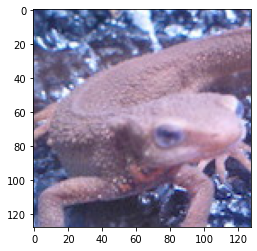

In [23]:
# Read image
img = cv2.imread("./img/imori.jpg")

# BGR -> RGB
img_rgb = BGR2RGB(img)

# imshow 需要的是 RGB
plot.imshow(im_pillow)

# cv2.imshow("BGR2RGB", img_rgb)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

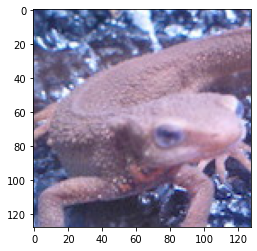

In [24]:
from PIL import Image
im_pillow = np.array(Image.open('./img/imori.jpg'))
plot.imshow(im_pillow)

使用 opencv 转换

In [25]:
im_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow("result", im_rgb2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## HSV变换

### HSV色彩空间介绍
![HSV-Color-Space.jpg](./img/HSV-Color-Space.jpg)


  * H通道: Hue 色调/色彩, 用这一个通道代表颜色.  将颜色使用$0^{\circ}$到$360^{\circ}$表示，就是平常所说的颜色名称，如红色、蓝色。色相与数值按下表对应
  
| 红          | 黄           | 绿            | 青色          | 蓝色          | 品红          | 红            |
| :----------- | :------------ | :------------- | :------------- | :------------- | :------------- | :------------- |
| $0^{\circ}$ | $60^{\circ}$ | $120^{\circ}$ | $180^{\circ}$ | $240^{\circ}$ | $300^{\circ}$ | $360^{\circ}$ |


  * S通道: Saturation 饱和度, 饱和度越高,这个色彩越纯.饱和度越低则颜色越黯淡（$0\leq S < 1$）

  * V通道: Value 明暗, 数值越高, 代表越明亮, 越接近白色，数值越低越接近黑色（$0\leq V < 1$）；

### HSV色彩用途

HSV模型通常用于计算机图形应用中。在用户必须选择一个颜色应用于特定图形元素各种应用环境中，经常使用HSV 色轮。在其中，色相表示为圆环；可以使用一个独立的三角形来表示饱和度和明度。典型的，这个三角形的垂直轴指示饱和度，而水平轴表示明度。在这种方式下，选择颜色可以首先在圆环中选择色相，在从三角形中选择想要的饱和度和明度。
![Triangulo_HSV.png](./img/Triangulo_HSV.png)
HSV模型的另一种可视方法是圆锥体。在这种表示中，色相被表示为绕圆锥中心轴的角度，饱和度被表示为从圆锥的横截面的圆心到这个点的距离，明度被表示为从圆锥的横截面的圆心到顶点的距离。某些表示使用了六棱锥体。这种方法更适合在一个单一物体中展示这个HSV色彩空间；但是由于它的三维本质，它不适合在二维计算机界面中选择颜色。
![750px-HSV_cone.png](./img/750px-HSV_cone.png)
HSV色彩空間还可以表示为类似于上述圆锥体的圆柱体，色相沿着圆柱体的外圆周变化，饱和度沿着从横截面的圆心的距离变化，明度沿着横截面到底面和顶面的距离而变化。这种表示可能被认为是HSV色彩空间的更精确的数学模型；但是在实际中可区分出的饱和度和色相的级别数目随着明度接近黑色而减少。此外计算机典型的用有限精度范围来存储RGB值；这约束了精度，再加上人类颜色感知的限制，使圆锥体表示在多数情况下更实用。
![HSV_cylinder.jpg](./img/HSV_cylinder.jpg)

### 转换公式
从$\text{RGB}$色彩表示转换到$\text{HSV}$色彩表示通过以下方式计算：

$\text{RGB}$的取值范围为$[0, 1]$，令：
$$
\text{Max}=\max(R,G,B)\\
\text{Min}=\min(R,G,B)
$$
色相：
$$
H=\begin{cases}
0&(\text{if}\ \text{Min}=\text{Max})\\
60\  \frac{G-R}{\text{Max}-\text{Min}}+60&(\text{if}\ \text{Min}=B)\\
60\  \frac{B-G}{\text{Max}-\text{Min}}+180&(\text{if}\ \text{Min}=R)\\
60\  \frac{R-B}{\text{Max}-\text{Min}}+300&(\text{if}\ \text{Min}=G)
\end{cases}
$$
饱和度：
$$
S=\text{Max}-\text{Min}
$$
明度：
$$
V=\text{Max}
$$
从$\text{HSV}$色彩表示转换到$\text{RGB}$色彩表示通过以下方式计算：
$$
C = S\\
H' = \frac{H}{60}\\
X = C\  (1 - |H' \mod 2 - 1|)\\
(R,G,B)=(V-C)\ (1,1,1)+\begin{cases}
(0, 0, 0)&  (\text{if H is undefined})\\
(C, X, 0)&  (\text{if}\quad 0 \leq H' < 1)\\
(X, C, 0)&  (\text{if}\quad 1 \leq H' < 2)\\
(0, C, X)&  (\text{if}\quad 2 \leq H' < 3)\\
(0, X, C)&  (\text{if}\quad 3 \leq H' < 4)\\
(X, 0, C)&  (\text{if}\quad 4 \leq H' < 5)\\
(C, 0, X)&  (\text{if}\quad 5 \leq H' < 6)
\end{cases}
$$

### 题目:请将色相反转（色相值加$180$），然后再用$\text{RGB}$色彩空间表示图片。

In [27]:
def BGR2HSV(_img):
    """
    BGR -> HSV
    """
    img = _img.copy() / 255.

    hsv = np.zeros_like(img, dtype=np.float32)

    # get max and min
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()
    min_arg = np.argmin(img, axis=2)

    # H
    hsv[..., 0][np.where(max_v == min_v)] = 0
    ## if min == B
    ind = np.where(min_arg == 0)
    hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
    ## if min == R
    ind = np.where(min_arg == 2)
    hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
    ## if min == G
    ind = np.where(min_arg == 1)
    hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300

    # S
    hsv[..., 1] = max_v.copy() - min_v.copy()

    # V
    hsv[..., 2] = max_v.copy()

    return hsv

In [28]:
def HSV2BGR(_img, hsv):
    img = _img.copy() / 255.

    # get max and min
    max_v = np.max(img, axis=2).copy()
    min_v = np.min(img, axis=2).copy()

    out = np.zeros_like(img)

    H = hsv[..., 0]
    S = hsv[..., 1]
    V = hsv[..., 2]

    C = S
    H_ = H / 60.
    X = C * (1 - np.abs(H_ % 2 - 1))
    Z = np.zeros_like(H)

    vals = [[Z, X, C], [Z, C, X], [X, C, Z], [C, X, Z], [C, Z, X], [X, Z, C]]

    for i in range(6):
        ind = np.where((i <= H_) & (H_ < (i + 1)))
        out[..., 0][ind] = (V - C)[ind] + vals[i][0][ind]
        out[..., 1][ind] = (V - C)[ind] + vals[i][1][ind]
        out[..., 2][ind] = (V - C)[ind] + vals[i][2][ind]

    out[np.where(max_v == min_v)] = 0
    out = np.clip(out, 0, 1)
    out = (out * 255).astype(np.uint8)

    return out

In [34]:
# Read image
img = cv2.imread("./img/imori.jpg").astype(np.float32)

# RGB > HSV
hsv = BGR2HSV(img)
print(hsv[..., 0] )

# Transpose Hue
hsv[..., 0] = (hsv[..., 0] + 180) % 360

# HSV > RGB
out = HSV2BGR(img, hsv)

# Save result
# cv2.imwrite("out.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[228.      225.23077 223.125   ... 240.90909 223.125   215.2381 ]
 [225.21739 228.      232.88135 ... 234.2857  224.15094 221.31148]
 [225.88235 229.84616 232.88135 ... 232.88135 223.56165 223.29114]
 ...
 [224.81012 226.0274  230.4762  ... 225.21739 219.04762 215.78947]
 [223.29114 225.19481 228.75    ... 228.26086 222.85715 221.01266]
 [222.85715 223.84615 228.75    ... 224.83516 219.75    215.84415]]


### 使用 opencv 解决

In [41]:
img = cv2.imread("./img/imori.jpg")

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Transpose Hue
hsv_img[..., 0] = (hsv_img[..., 0] + 180) % 360
out_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
cv2.imshow("result", out_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 灰度化（Grayscale）

灰度是一种图像亮度的表示方法，通过下式计算：
$$
Y = 0.2126\  R + 0.7152\  G + 0.0722\  B
$$


In [54]:
def BGR2GRAY(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    print(b.shape)
    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)
    return out

In [56]:
img = cv2.imread("./img/imori.jpg")
print(img.dtype)
# Grayscale
out = BGR2GRAY(img)

# Save result
#cv2.imwrite("out.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

uint8
(128, 128)


### 使用 opencv 解决

In [57]:
# Grayscale
out = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Save result
#cv2.imwrite("out.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

或者

In [62]:
# Grayscale
out = cv2.imread("./img/imori.jpg", cv2.IMREAD_GRAYSCALE)

# Save result
#cv2.imwrite("out.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 二值化（Thresholding）

二值化是将图像使用黑和白两种颜色表示的方法。

我们将灰度的阈值设置为$128$来进行二值化，即：
$$
y=
\begin{cases}
0& (\text{if}\quad y < 128) \\
255& (\text{else})
\end{cases}
$$

In [60]:
def binarization(img, th=128):
    """
    二值化
    """
    img[img < th] = 0
    img[img >= th] = 255
    return img

In [65]:
# Binarization
img = cv2.imread("./img/imori.jpg", cv2.IMREAD_GRAYSCALE)

out = binarization(img)

cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 使用 opencv 解决

In [74]:
img = cv2.imread("./img/imori.jpg", cv2.IMREAD_GRAYSCALE)
#二值化处理，低于阈值的像素点灰度值置为0；高于阈值的值置为参数3
ret,thresh1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
cv2.imshow('BINARY',thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 大津二值化算法（Otsu's Method）

大津算法，也被称作最大类间方差法，是一种可以自动确定二值化中阈值的算法。

从**类内方差**和**类间方差**的比值计算得来：


- 小于阈值$t$的类记作$0$，大于阈值$t$的类记作$1$；
- $w_0$和$w_1$是被阈值$t$分开的两个类中的像素数占总像素数的比率（满足$w_0+w_1=1$）；
- ${S_0}^2$， ${S_1}^2$是这两个类中像素值的方差；
- $M_0$，$M_1$是这两个类的像素值的平均值；

即：

* 类内方差：${S_w}^2=w_0\ {S_0}^2+w_1\  {S_1}^2$
* 类间方差：${S_b}^2 = w_0 \  (M_0 - M_t)^2 + w_1\ (M_1 - M_t)^2 = w_0\  w_1\  (M_0 - M_1) ^2$
* 图像所有像素的方差：${S_t}^2 = {S_w}^2 + {S_b}^2 = \text{常数}$

根据以上的式子，我们用以下的式子计算分离度$X$：[^1]

[^1]: 这里原repo配图里的公式好像打错了。

$$
X = \frac{{S_b}^2}{{S_w}^2} = \frac{{S_b}^2}{{S_t}^2 - {S_b}^2}
$$

也就是说： 
$$
\arg\max\limits_{t}\ X=\arg\max\limits_{t}\ {S_b}^2
$$
换言之，如果使${S_b}^2={w_0}\ {w_1}\ (M_0 - M_1)^2$最大，就可以得到最好的二值化阈值$t$。


In [72]:
# Otsu Binarization
def otsu_binarization(img):
    max_sigma = 0
    max_t = 0
    H, W = img.shape
    # determine threshold
    for _t in range(1, 255):
        v0 = img[np.where(img < _t)]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) / (H * W)
        v1 = img[np.where(img >= _t)]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) / (H * W)
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        if sigma > max_sigma:
            max_sigma = sigma
            max_t = _t

    # Binarization
    print("threshold >>", max_t)
    img[img < max_t] = 0
    img[img >= max_t] = 255

    return img

In [76]:
img = cv2.imread("./img/imori.jpg", cv2.IMREAD_GRAYSCALE)
# Otsu's binarization
out = otsu_binarization(img)

# Save result
# cv2.imwrite("out.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

threshold >> 130


##  图像彩色量化（减色处理)

$\text{RGB}$ 的像素值在 0~255之间，我们想要用更少的内存空间表征一张图像时怎么办呢？首先是减色处理，将图像用 32， 96， 160， 224 这 4 个像素值表示。我们将图像的值由$256^3$压缩至$4^3$，即将$\text{RGB}$的值只取$\{32, 96, 160, 224\}$。这被称作色彩量化。色彩的值按照下面的方式定义：
$$
\text{val}=
\begin{cases}
32& (0 \leq \text{var} <  64)\\
96& (64\leq \text{var}<128)\\
160&(128\leq \text{var}<192)\\
224&(192\leq \text{var}<256)
\end{cases}
$$

In [81]:
# Dicrease color
def decrease_color(img):
    out = img.copy()
    out = out // 64 * 64 + 32
    return out

In [83]:
# Read image
img = cv2.imread("./img/imori.jpg")

# Dicrease color
out = decrease_color(img)

#cv2.imwrite("out.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()